In [3]:
import os, pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

In [4]:
methods = ['Proposed', 'Griffin', 'GCparagon']

# Fragment No. Deviation

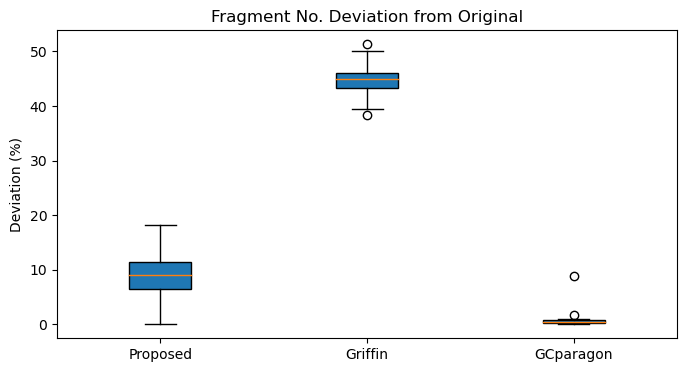

In [5]:
def load_deviations(METHOD):
    dic_path = f'Evaluation_Files/{METHOD}/fragment_no_deviation.pkl'
    cohorts = ['BRCA_gis', 'CRC_gis', 'healthy_c2i', 'healthy_invitro']
    dic = {}
    with open(dic_path, 'rb') as f:
        dic = pickle.load(f)
    deviations = []
    for cohort in cohorts:
        files = os.listdir(f'1Mb_2K_bins/Original/{cohort}/')
        sample_names = [file_[:-4] for file_ in files]
        for sample_name in sample_names:
            deviations.append(dic[sample_name])
    return deviations

data = []
for method in methods:
    data.append( load_deviations(method) )
_, proposed_griffin_p = wilcoxon(data[0], data[1], alternative='less')
_, proposed_gcparagon_p = wilcoxon(data[0], data[2], alternative='greater')
# title = f'Fragment No. Deviation from Original\nProposed < Griffin: {proposed_griffin_p}\n Proposed > GCparagon: {proposed_gcparagon_p}'
title = f'Fragment No. Deviation from Original'
plt.figure(figsize=(8, 4))
plt.boxplot(data, patch_artist=True, vert=True, labels=methods)
plt.title(title)
plt.ylabel('Deviation (%)')
plt.show()

# JS Divergence from Reference

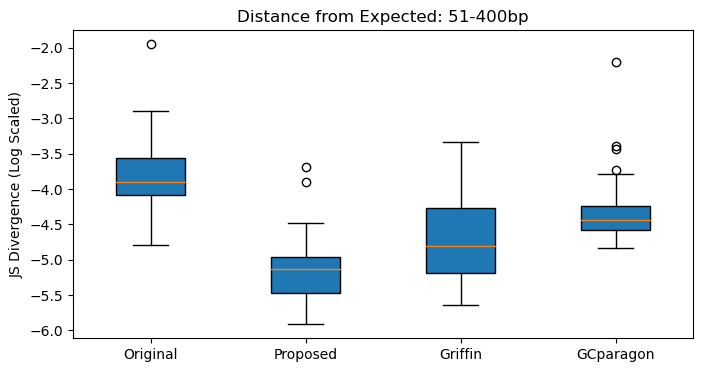

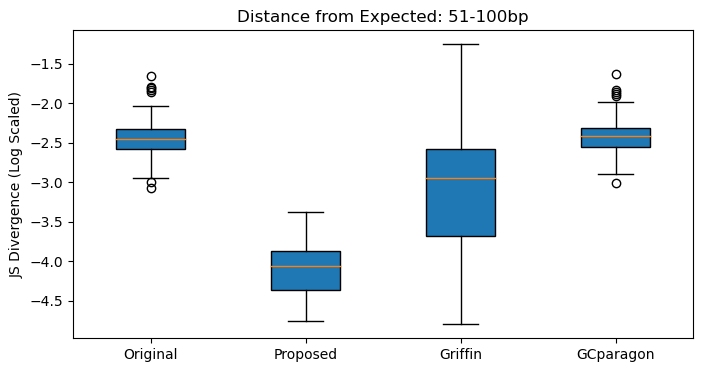

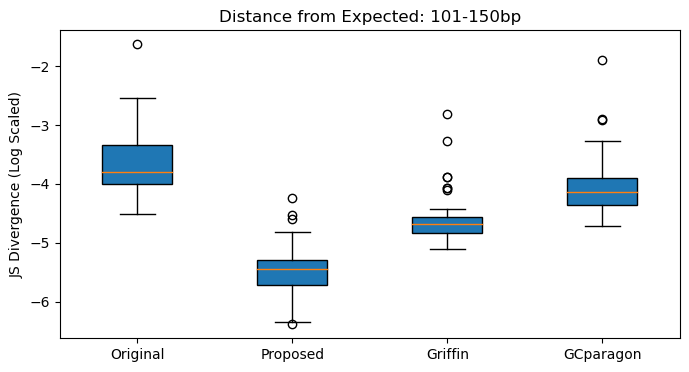

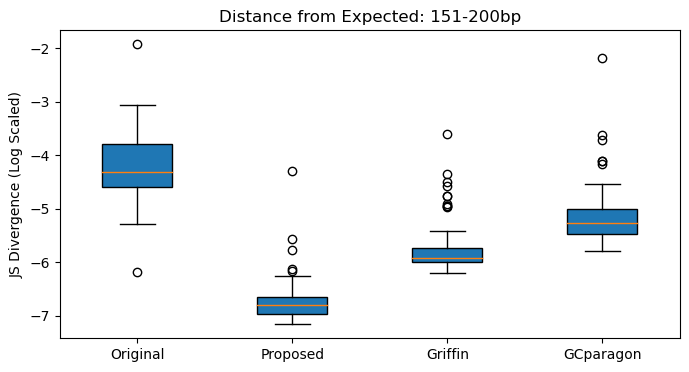

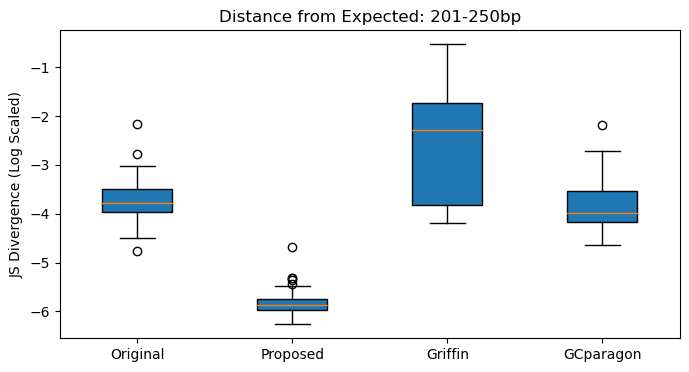

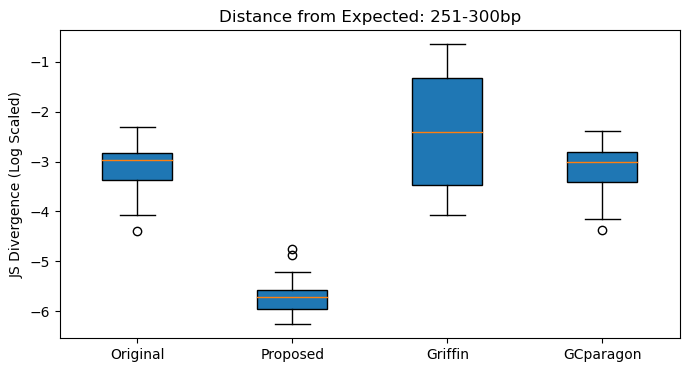

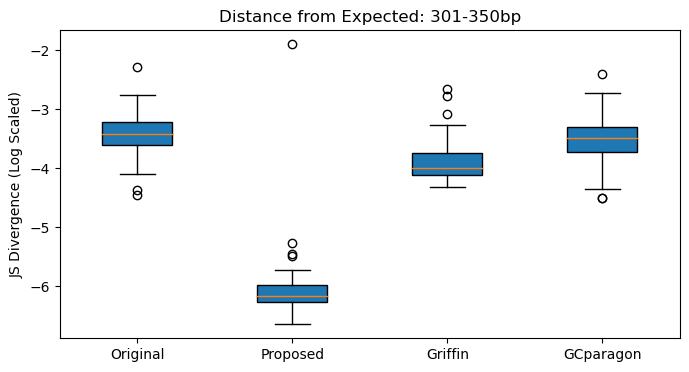

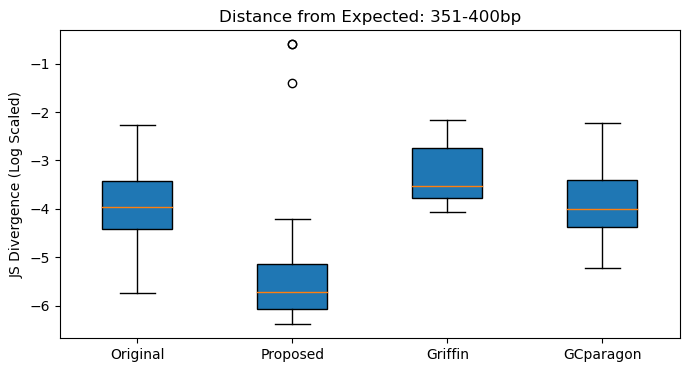

In [3]:
len_groups = [[51, 400], [51, 100], [101, 150], [151, 200], [201, 250], [251, 300], [301, 350], [351, 400]]
methods = ['Original', 'Proposed', 'Griffin', 'GCparagon']

def load_JS(METHOD, len_group):
    dic_path = f'Evaluation_Files/{METHOD}/reference_JS_divergence.pkl'
    cohorts = ['BRCA_gis', 'CRC_gis', 'healthy_c2i', 'healthy_invitro']
    dic = {}
    with open(dic_path, 'rb') as f:
        dic = pickle.load(f)
    JS_list = []
    for cohort in cohorts:
        files = os.listdir(f'1Mb_2K_bins/Original/{cohort}/')
        sample_names = [file_[:-4] for file_ in files]
        for sample_name in sample_names:
            key = f'{sample_name}: {len_group[0]}-{len_group[1]}'
            JS_list.append(np.log2(dic[key]))
    return JS_list

def compare_JS(len_group):
    data = []
    for method in methods:
        data.append( load_JS(method, len_group) )
    _, proposed_original_p = mannwhitneyu(data[1], data[0], alternative='less')
    _, proposed_griffin_p = mannwhitneyu(data[1], data[2], alternative='less')
    _, proposed_gcparagon_p = mannwhitneyu(data[1], data[3], alternative='less')
    # title = f'Distance from Expected: {len_group[0]}-{len_group[1]}bp\nProposed < Original: {proposed_original_p}\nProposed < Griffin: {proposed_griffin_p}\n Proposed < GCparagon: {proposed_gcparagon_p}'
    title = f'Distance from Expected: {len_group[0]}-{len_group[1]}bp'
    plt.figure(figsize=(8, 4))
    plt.boxplot(data, patch_artist=True, vert=True, labels=methods)
    plt.title(title)
    plt.ylabel('JS Divergence (Log Scaled)')
    plt.show()

for len_group in len_groups:
    compare_JS(len_group)

# Comparing Mean CV

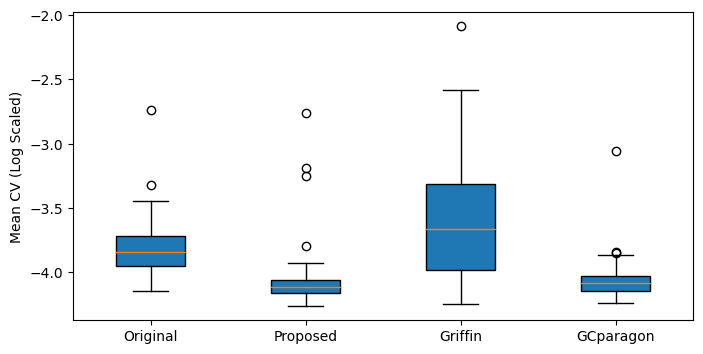

In [3]:
methods = ['Original', 'Proposed', 'Griffin', 'GCparagon']

def load_CV(METHOD):
    dic_path = f'Evaluation_Files/{METHOD}/CV.pkl'
    cohorts = ['BRCA_gis', 'CRC_gis', 'healthy_c2i', 'healthy_invitro']
    dic = {}
    with open(dic_path, 'rb') as f:
        dic = pickle.load(f)
    CV_list = []
    for cohort in cohorts:
        files = os.listdir(f'1Mb_2K_bins/Original/{cohort}/')
        sample_names = [file_[:-4] for file_ in files]
        for sample_name in sample_names:
            mean_CV = np.mean( dic[sample_name] )
            CV_list.append(np.log2(mean_CV))
    return CV_list

data = []
for method in methods:
    data.append( load_CV(method) )
_, proposed_original_p = mannwhitneyu(data[1], data[0], alternative='less')
_, proposed_griffin_p = mannwhitneyu(data[1], data[2], alternative='less')
_, proposed_gcparagon_p = mannwhitneyu(data[1], data[3], alternative='less')
# title = f'Mean CV Comparison\nProposed < Original: {proposed_original_p}\nProposed < Griffin: {proposed_griffin_p}\n Proposed < GCparagon: {proposed_gcparagon_p}'
plt.figure(figsize=(8, 4))
plt.boxplot(data, patch_artist=True, vert=True, labels=methods)
# plt.title(title)
plt.ylabel('Mean CV (Log Scaled)')
plt.show()

# CV Method vs Method Correlation

In [6]:
def correlation_plot(method1, method2):
    M1_CV_dic, M2_CV_dic = {}, {}
    with open(f'Evaluation_Files/{method1}/CV.pkl', 'rb') as f:
        M1_CV_dic = pickle.load(f)
    with open(f'Evaluation_Files/{method2}/CV.pkl', 'rb') as f:
        M2_CV_dic = pickle.load(f)
    for sample_name in M1_CV_dic.keys():
        X = np.log2(M1_CV_dic[sample_name])
        Y = np.log2(M2_CV_dic[sample_name])
        plt.figure(figsize=(6, 6))
        plt.scatter(X, Y)
        plt.title(sample_name)
        plt.xlabel(f'{method1} CV (Log Scaled)')
        plt.ylabel(f'{method2} CV (Log Scaled)')
        min_val = min(min(X), min(Y))
        max_val = max(max(X), max(Y))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
        plt.show()

In [7]:
# correlation_plot('Griffin', 'Proposed')

In [8]:
# correlation_plot('GCparagon', 'Proposed')